In [49]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [50]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [51]:
x_train=x_train/255
x_test=x_test/255

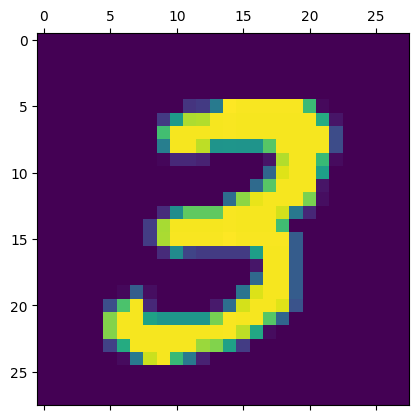

In [52]:
plt.matshow(x_train[7])

In [53]:
x_train.shape

(60000, 28, 28)

In [54]:
y_train.shape

(60000,)

In [55]:
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)

In [56]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy'
              )

model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 503us/step - loss: 0.4710 - accuracy: 0.8761
Epoch 2/5
1875/1875 [==============================] - 1s 468us/step - loss: 0.3039 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 1s 455us/step - loss: 0.2831 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 1s 452us/step - loss: 0.2734 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 1s 465us/step - loss: 0.2661 - accuracy: 0.9254


In [57]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 0s 396us/step - loss: 0.2685 - accuracy: 0.9265


[0.26850977540016174, 0.9265000224113464]

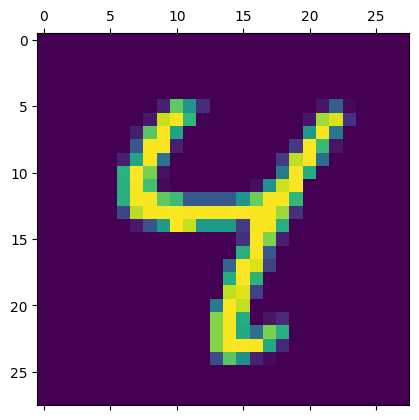

In [58]:
plt.matshow(x_test[6])

In [59]:
predictions=model.predict(x_test_flatten)

313/313 [==============================] - 0s 312us/step


In [60]:
np.argmax(predictions[6])

4

In [61]:
y_pred=[np.argmax(i) for i in predictions ]

In [62]:
conf_mat=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

Text(95.72222222222221, 0.5, 'Truth')

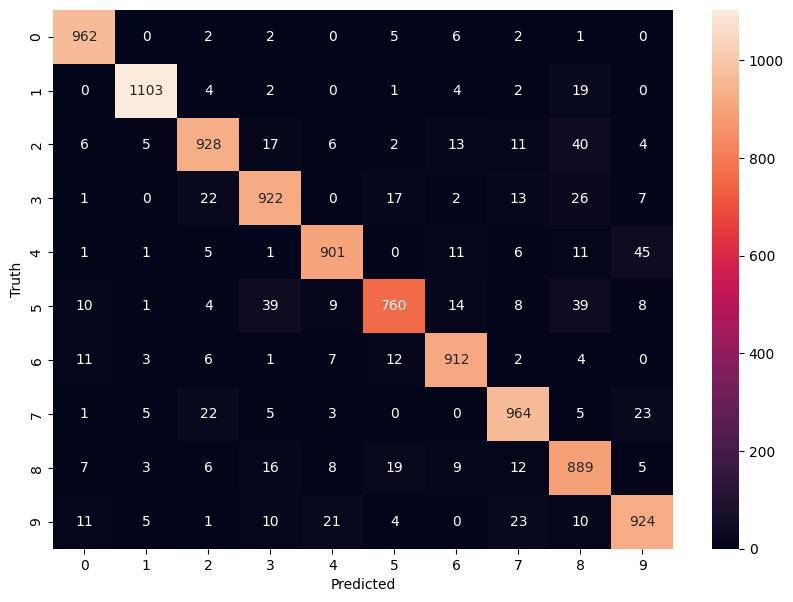

In [63]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap (conf_mat, annot=True, fmt='d') 
plt.xlabel('Predicted') 
plt.ylabel ('Truth')

In [64]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy'
              )

model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 807us/step - loss: 0.2753 - accuracy: 0.9212
Epoch 2/5
1875/1875 [==============================] - 1s 761us/step - loss: 0.1249 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 1s 729us/step - loss: 0.0871 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 1s 729us/step - loss: 0.0661 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 1s 688us/step - loss: 0.0522 - accuracy: 0.9838


In [65]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 0s 482us/step - loss: 0.0700 - accuracy: 0.9787


[0.0699644386768341, 0.9786999821662903]

In [82]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy'
              )

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 838us/step - loss: 0.6559 - accuracy: 0.8338
Epoch 2/5
1875/1875 [==============================] - 2s 804us/step - loss: 0.3445 - accuracy: 0.9035
Epoch 3/5
1875/1875 [==============================] - 1s 674us/step - loss: 0.2984 - accuracy: 0.9154
Epoch 4/5
1875/1875 [==============================] - 1s 685us/step - loss: 0.2688 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 1s 653us/step - loss: 0.2462 - accuracy: 0.9308


In [85]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

tf_callback=tf.keras.callbacks.TensorBoard(log_dir="log",histogram_freq=1)


model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy'
              )

model.fit(x_train,y_train,epochs=5,callbacks=[tf_callback])

Epoch 1/5
1875/1875 [==============================] - 1s 640us/step - loss: 0.6455 - accuracy: 0.8362
Epoch 2/5
1875/1875 [==============================] - 1s 577us/step - loss: 0.3403 - accuracy: 0.9051
Epoch 3/5
1875/1875 [==============================] - 1s 618us/step - loss: 0.2916 - accuracy: 0.9176
Epoch 4/5
1875/1875 [==============================] - 2s 994us/step - loss: 0.2622 - accuracy: 0.9264
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2400 - accuracy: 0.9324
